<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/lectures/module5/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сегментація зображень

У сфері комп'ютерного зору сегментація зображень є фундаментальним завданням, яке передбачає поділ зображення на значущі області або об'єкти. Вона спрямована на розуміння змісту зображення шляхом присвоєння мітки (категорії) кожному пікселю. Це дозволяє виокремити певні об'єкти, проаналізувати їхні форми та взаємозв'язки, а також отримати глибшу інформацію з даних зображення.

**Приклади застосування сегментації зображень**

* **Самокеровані автомобілі:** Сегментація смуг руху, транспортних засобів і пішоходів для автономної навігації.
* **Медична візуалізація:** Ідентифікація пухлин, органів та інших структур на медичних знімках для діагностики та аналізу.
* **Розпізнавання об'єктів:** Виділення цікавих об'єктів для кращого розпізнавання та класифікації.
* **Редагування зображень:** Автоматизація видалення фону (наприклад, зелений екран) або маніпуляцій з об'єктами (наприклад, масштабування з урахуванням вмісту).

![](https://viso.ai/wp-content/uploads/2021/03/image-segmentation-example-1060x397.jpg)

## Типи сегментації зображень

Існують різні підходи до сегментації зображень, які класифікуються залежно від рівня деталізації та наданої інформації:

* **Semantic Segmentation:** Призначає кожному пікселю мітку класу (наприклад, небо, автомобіль, дорога), що дає змогу зрозуміти вміст зображення на високому рівні.
* **Instance Segmentation:** Розрізняє екземпляри одного класу об'єктів. Наприклад, сегментація окремих автомобілів на парковці замість того, щоб просто позначити всю область як "автомобілі".
* **Panoptic Segmentation:** Поєднує семантичну сегментацію та сегментацію екземплярів, надаючи як мітки класів, так і окремі екземпляри об'єктів.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_image-segmentation%202.jpeg)

## Методи сегментації зображень

1. **Thresholding:** Проста техніка, яка розділяє пікселі на основі значень їхньої інтенсивності. Ефективна для зображень з високим контрастом між переднім і заднім планом.

2. **Edge Detection:** Визначає межі між об'єктами, виявляючи різкі зміни в інтенсивності або кольорі. Краї можна використовувати як відправну точку для подальшої сегментації.

3. **Region-based Segmentation:** Групує пікселі зі схожими характеристиками (колір, інтенсивність, текстура) у регіони, що відповідають об'єктам. Такі методи, як кластеризація K-середніх або сегментація вододілів, належать до цієї категорії.

4. **Deep Learning-based Segmentation:** Згорткові нейронні мережі (CNN) зробили революцію в сегментації зображень. Такі популярні архітектури, як U-Net, FCN (Fully Convolutional Network) та DeepLab досягають високої точності завдяки вивченню складних взаємозв'язків між пікселями та відповідними їм класами об'єктів.

![](https://www.researchgate.net/publication/323597886/figure/fig2/AS:601386504957959@1520393124691/Convolutional-neural-network-CNN-architecture-based-on-UNET-Ronneberger-et-al.png)

![](https://www.researchgate.net/publication/350119533/figure/fig1/AS:1020546649169926@1620328690347/Network-structure-of-DeepLab-V3-The-DeepLab-V3-network-uses-dilated-convolution-and.png)

[Документація](https://pytorch.org/vision/stable/models.html#semantic-segmentation)

In [ ]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms

# Завантажуємо зображення
img = read_image("/content/golden-retriever.jpg")

# Змінюємо розмір
img = transforms.Resize((520, 520))(img)

# Завантажуємо натреновану модель
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:02<00:00, 58.3MB/s]


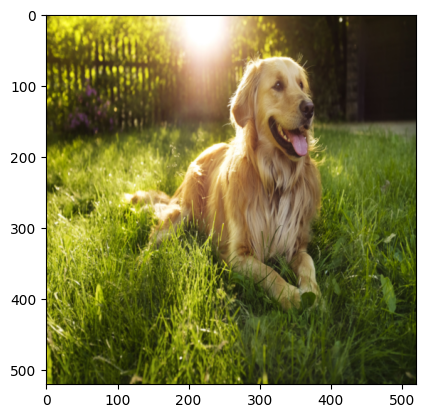

In [ ]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img.permute(1, 2, 0))

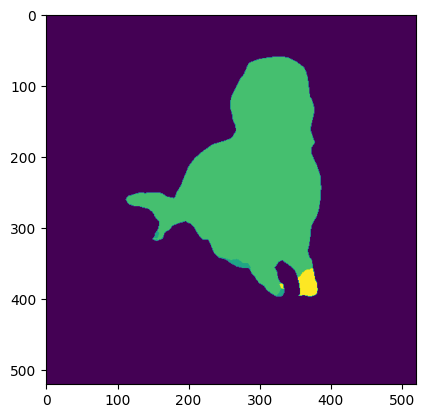

In [ ]:
plt.imshow(mask)

In [ ]:
mask.unique()

tensor([ 0, 10, 12, 17])

In [ ]:
# Індекси класів
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

[Документація по візуалізації](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-segmentation-masks)

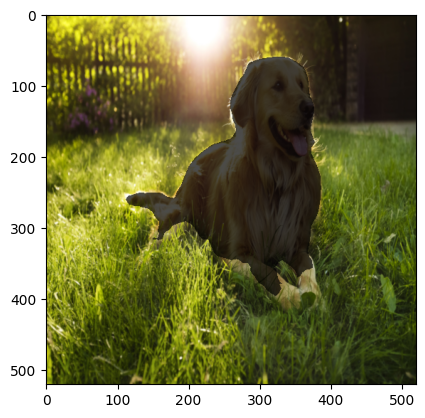

In [ ]:
from torchvision.utils import draw_segmentation_masks

dog_mask = mask == class_to_idx['dog']

masked_img = draw_segmentation_masks(img, dog_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

Власна візуалізація

In [ ]:
img.shape

torch.Size([3, 520, 520])

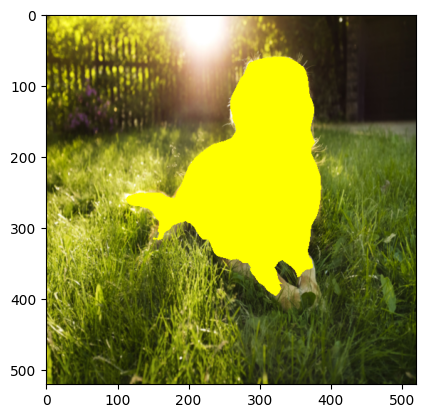

In [ ]:
masked_img = img.clone() # копіювання
masked_img = masked_img.to(int) # зміна типу даних на int

yellow_pixel = torch.tensor([255, 255, 0])
masked_img[:, dog_mask] = yellow_pixel.view(-1, 1)

plt.imshow(masked_img.permute(1, 2, 0))

# Виявлення об'єктів

Виявлення об'єктів - це фундаментальна задача комп'ютерного зору, яка має на меті ідентифікувати та визначити місцезнаходження об'єктів на зображенні або відео. Воно виходить за рамки простої класифікації зображень (визначення того, що є на зображенні) і полягає у точному визначенні конкретного місця розташування цих об'єктів.

Цей посібник заглиблюється у світ виявлення об'єктів, охоплюючи його застосування, загальні підходи та принцип роботи.

**Сфери застосування виявлення об'єктів:**

* **Самокеровані автомобілі:** Ідентифікація пішоходів, транспортних засобів і дорожніх знаків для безпечної навігації.
* **Розпізнавання облич:** Виявлення облич на зображеннях і відео для систем безпеки, маркетингу та соціальних мереж.
* **Медична візуалізація:** Виявлення пухлин та інших аномалій на рентгенівських або МРТ-знімках.
* **Аналітика роздрібної торгівлі:** Відстеження поведінки клієнтів і виявлення об'єктів, що представляють інтерес в магазинах.
* **Відеоспостереження:** Виявлення підозрілої активності або моніторинг певних зон.

![](https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/file-uploads/blogs/22606/images/1446e76-f181-6047-4e73-8d8ba3c6a50e_object_detection_1.webp)

# Поширені підходи до виявлення об'єктів

Існує два основних підходи до виявлення об'єктів:

1. **Двоетапне виявлення:**
    * Цей підхід передбачає два окремі етапи:
        * **Пропозиція областей:** Модель пропонує області-кандидати на зображенні, які можуть містити об'єкти.
        * **Класифікація та уточнення:** Ці запропоновані області потім класифікуються (що це за об'єкт?) та уточнюються (коригується обмежувальна рамка для кращої локалізації).
    * Приклади: R-CNN (Регіони з ознаками CNN), Faster R-CNN (швидша версія R-CNN), Mask R-CNN (додатково прогнозує маски об'єктів для сегментації).

2. **Одноступеневе розпізнавання:**.
    * Цей підхід безпосередньо передбачає граничні поля та ймовірності класів за один крок.
    * Зазвичай він швидший за двоетапне виявлення, але може бути менш точним для складних сцен.
    * Приклади: YOLO (You Only Look Once), SSD (Single Shot MultiBox Detector).

![](https://ars.els-cdn.com/content/image/1-s2.0-S1051200420301019-gr001.jpg)

![](https://miro.medium.com/v2/resize:fit:678/1*MO3DCmsUqzF23MsQh_CDng.png)

## Ultralytics YOLO

Ultralytics YOLO - це сучасна модель виявлення об'єктів, відома своєю ефективністю та точністю. Цей гайд занурюється в її функціональні можливості, пояснює параметри методу `model.predict` та структуру результатів, а також демонструє, як візуалізувати виявлення за допомогою `result.plot`.

In [ ]:
!pip install -q ultralytics

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model.predict(source='https://ultralytics.com/images/bus.jpg',
                        conf = 0.2,
                        iou=0.7)

result = results[0]


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 36 persons, 10 buss, 3 stop signs, 587.6ms
Speed: 4.7ms preprocess, 587.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


[Документація](https://docs.ultralytics.com/modes/predict/#inference-arguments)

Метод `model.predict` використовується для прогнозування на основі заданого зображення або відео. Ось розбивка його параметрів:

* **source (str):** Шлях до зображення або відеофайлу, на якому ви хочете зробити прогноз.
* **conf (float, optional):** Поріг достовірності (від 0 до 1) для фільтрації низькодостовірних виявлень. За замовчуванням 0.25.
* **iou (плаваюче число, необов'язкове):** Поріг перетину над об'єднанням (IoU) для фільтрації виявлень, що перекриваються. За замовчуванням 0.7.
* **augment (bool, необов'язково):** Застосовує випадкові методи доповнення даних для покращення робастності моделі. Значення за замовчуванням - False.
* **agnostic (bool, необов'язковий):** Якщо значення True, розглядає всі виявлені об'єкти як один клас. За замовчуванням False.
* **visualize (bool, необов'язковий):** Відображає зображення або відео з накладеними на них виявленими об'єктами. За замовчуванням False.
* **device (str, необов'язково):** Вказує пристрій, який слід використовувати для виведення (наприклад, 'cpu' або 'cuda' для графічного процесора). За замовчуванням використовується 'cpu'.
* **classes (List[str], опціонально):** Список імен класів, що відповідають індексам класів у моделі. Обов'язковий для візуалізації виявлених об'єктів з мітками класів.


In [ ]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Ultralytics використовує об'єкт `Results` для зберігання результатів виявлення об'єктів та інших завдань виведення. Цей об'єкт містить різні атрибути, які надають детальну інформацію про виявлені об'єкти на зображенні. Нижче наведено опис ключових атрибутів об'єкта `Results`:

* **boxes:** (Необов'язково) Об'єкт `Boxes`, що містить обмежувальні рамки для виявлених об'єктів. Кожна з них представлена списком, що містить чотири елементи: `[x_min, y_min, x_max, y_max]`, де:
    * `x_min` та `y_min` - координати лівого верхнього кута рамки.
    * `x_max` та `y_max` - координати правого нижнього кута обмежувальної рамки.
* **masks:** (Необов'язково) Об'єкт `Masks`, що містить маски сегментації для виявлених об'єктів (якщо виконується сегментація). Ці маски, як правило, є бінарними зображеннями того ж розміру, що і вихідне зображення, де кожен піксель представляє наявність (1) або відсутність (0) об'єкта.
* **probs:** (Необов'язково) Об'єкт `probs`, що містить ймовірності класів для кожного виявленого об'єкта. Цей об'єкт є списком або тензором, довжина якого дорівнює кількості виявлених об'єктів, де кожен елемент представляє ймовірність належності об'єкта до певного класу. Порядок ймовірностей відповідає міткам класів, що використовуються під час навчання.
* **keypoints:** (Необов'язково) Об'єкт `Keypoints`, що містить виявлені ключові точки для кожного об'єкта (якщо було виконано виявлення ключових точок). Формат та інтерпретація ключових точок залежать від конкретної задачі та набору даних, що використовується для навчання.
* **obb:** (**Не рекомендований атрибут згідно з проблемами Ultralytics GitHub**) Хоча це офіційно не задокументовано і потенційно є помилкою, деякі користувачі можуть зіткнутися з атрибутом `obb` в об'єкті `Results`. Загалом рекомендується не покладатися на цей атрибут і використовувати підтримувані, такі як `boxes`.
* **names:** (Необов'язково) Список, що містить імена класів, які відповідають виявленим об'єктам. Порядок імен відповідає порядку обмежувальних рамок, масок та ймовірностей.

In [ ]:
img_with_detection = result.plot(filename='result.png',
                                 save=True)

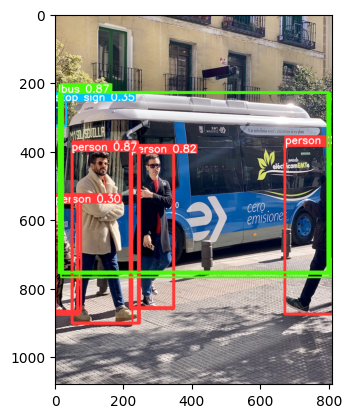

In [ ]:
plt.imshow(img_with_detection[:, :, ::-1])

[Документація](https://docs.ultralytics.com/modes/predict/#working-with-results)

Метод `result.plot` в UltraLytics використовується для візуалізації результатів виведення моделі на зображенні.

**Параметри:**

* `conf`: (bool) Якщо `True`, включити оцінки достовірності виявлення.
* `line_width`: (float) Керує **товщиною ліній обмежувальних рамок** на графіку. За замовчуванням дорівнює 2.
* `font_size`: (int) Встановлює **розмір шрифту** для міток та назв класів на діаграмі. За замовчуванням 30.
* `labels`: (bool) Якщо `True`, відображає **підписи класів** поруч з кожним виявленням. За замовчуванням `True`.
* `boxes`: (bool) Якщо `True`, відображає **обмежувальні рамки** навколо виявлень. За замовчуванням `True`.
* `masks`: (bool) Якщо `True`, відображає **маски сегментації** для виявлених об'єктів (якщо доступні з моделі). За замовчуванням `False`.
* `save`: (boll) Якщо `True`, збереже анотоване зображення у файл, вказаний за допомогою параметра `filename`..
* `filename`: (str) Шлях або ім'я файлу для збереження анотованого зображення, якщо `save` має значення `True`.
* `show`: (bool) Відобразить анотоване зображення безпосередньо за допомогою програми для перегляду зображень за замовчуванням. За замовчуванням `False`.

[Документація](https://docs.ultralytics.com/modes/predict/#plotting-results)

# Дифузійні моделі

Дифузійні моделі - це потужний клас генеративних моделей у глибокому навчанні, які можуть створювати високоточні зображення шляхом поступового додавання деталей до шуму. На відміну від традиційних генеративних моделей, які вивчають відображення від прихованого простору до зображення, дифузійні моделі вивчають зворотний процес: перетворення чистого зображення на шум. Потім вони вчаться зворотному процесу дифузії, ефективно знебарвлюючи зображення і відновлюючи вихідні дані.

**Ключові поняття в дифузійних моделях**

1. **Процес дифузії:** Модель бере чисте зображення і поступово вводить в нього шум за допомогою серії кроків, перетворюючи його на чистий шум. Це "псує" зображення контрольованим чином.
2. **Архітектура U-Net:** Типова архітектура дифузійної моделі нагадує U-Net зі структурою кодер-декодер. Кодер стискає зашумлене зображення під час процесу дифузії, в той час як декодер вчиться зворотному додаванню шуму під час процесу знешумлення (або генерації зображення).
3. **Мережа предикторів:** На кожному кроці дифузії мережа предикторів приймає поточне зашумлене зображення як вхідні дані і пророкує шум, який було додано на попередньому кроці. Мінімізуючи різницю між прогнозованим шумом і фактичним шумом, модель навчається процесу зашумлення.

![](https://miro.medium.com/v2/resize:fit:700/1*KtgUrX1_McQig6unuOsU4g.png)

## Генерація зображень за допомогою дифузійних моделей

1. **Почати з шуму:** Процес починається з чистого шуму як початкового вхідного сигналу.
2. **Зворотні кроки дифузії:** Модель ітеративно застосовує вивчений процес згладжування, поступово видаляючи шум і відновлюючи деталі зображення.
3. **Формування зображення:** За допомогою декількох етапів знешумлення модель поступово покращує зображення, зрештою генеруючи високоякісне зображення з початкового шуму.

**Переваги дифузійних моделей:**

* **Високоточна генерація зображень:** Дифузійні моделі можуть створювати неймовірно реалістичні та деталізовані зображення, часто перевершуючи за якістю інші генеративні моделі.
* **Різноманітність зразків:** Регулюючи рівень шуму в процесі генерації, дифузійні моделі можуть створювати різноманітні варіації зображень, зберігаючи при цьому когерентність.
* **Менші вимоги до навчання:** Порівняно з деякими генеративними моделями, дифузійні моделі можуть досягати хороших результатів навіть з меншими навчальними наборами даних.

![](https://miro.medium.com/v2/resize:fit:1400/1*418rztXdF877Nfrh38wIhA.png)

## Застосування дифузійних моделей

* **Редагування зображень:** Дифузійні моделі можна використовувати для таких завдань, як зафарбовування зображень (заповнення відсутніх ділянок зображення) або перенесення стилю (застосування художнього стилю одного зображення до іншого).
* **Синтез текст-зображення:** Дифузійні моделі можуть бути обумовлені текстовими описами, щоб генерувати зображення, які відповідають текстовому вводу.
* **Генеративний дизайн:** Дифузійні моделі можна використовувати для творчих пошуків і дизайнерських завдань, генеруючи нові варіації зображень на основі підказок користувача.

[Докуметнація](https://huggingface.co/docs/diffusers/using-diffusers/pipeline_overview)

In [ ]:
! pip install -q diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 22.2 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/852 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

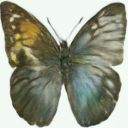

In [ ]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128").to('cuda')
image = generator(num_inference_steps=100).images[0]
image